# Perceptron

Perceptron is an algorithm for supervised learning a binary classifier called a threshold function: a function that maps its input $\boldsymbol{\mathrm{x}}$ (a real-valued vector) to an output value $f(\boldsymbol{\mathrm{x}})$ (a single binary value):

$$ f(\boldsymbol{\mathrm{x}}) =
  \begin{cases}
    1       & \quad \text{if } \boldsymbol{\mathrm{w}} \cdot \boldsymbol{\mathrm{x}} + b > 0, \\
    0  & \quad \text{ otherwise}
  \end{cases}
$$

If we consider bias $b$ as part of the weight $\boldsymbol{\mathrm{w}}$ vector for which input will always be 1, we can simply rewrite the threshold functions as:

$$ f(\boldsymbol{\mathrm{x}}) =
  \begin{cases}
    1       & \quad \text{if } \boldsymbol{\mathrm{w}} \cdot \boldsymbol{\mathrm{x}} > 0, \\
    0  & \quad \text{ otherwise}
  \end{cases}
$$


**Training the model**: We try to adjust the input weights $\boldsymbol{\mathrm{w}}$ according to following learning step:

$$ \boldsymbol{\mathrm{w}} \leftarrow \boldsymbol{\mathrm{w}} + (\boldsymbol{\mathrm{x}} \cdot \eta \cdot e )$$

where:
- $ \eta $ : Learning rate, having value in the range [0, 1]
- $ e $ : Error = $y_{labeled} - f(\boldsymbol{\mathrm{x}})$


In [1]:
import numpy as np
from sklearn.metrics import accuracy_score

In [2]:
class Perceptron(object):
    """A perceptron class"""
    
    def __init__(self, input_datum_size, learning_rate = 0.1, epochs = 100):
        self.weights = np.zeros(input_datum_size + 1) # added one for bias
        self.learning_rate = learning_rate
        self.epochs = epochs
        
    def activation(self, value):
        return 1 if value >= 0 else 0
    
    def prepare_input(self, input_datum):
        # Insert 1 (bias input) before index 0 (i.e first position) in the input datum array
        return np.insert(input_datum, 0, 1)
    
    def predict(self, input_datum):
        input_datum = np.array(input_datum)
        if (input_datum.shape[0] != self.weights.shape[0]): 
            input_datum = self.prepare_input(input_datum)
        return self.activation(self.weights.T.dot(input_datum))
        
        
    def fit(self, input_data, expected_output_data):
        """Fits the model to given input and expected data"""
        for _ in range(self.epochs):
            # Iterate for input-output data size
            for i in range(expected_output_data.shape[0]):
                input_datum = self.prepare_input(input_data[i])
                predicted_output_datum = self.predict(input_datum)
                err = expected_output_data[i] - predicted_output_datum
                self.weights = self.weights + self.learning_rate * err * input_datum
                
    

In [3]:
input_data = np.array([
        [0, 0],
        [0, 1],
        [1, 0],
        [1, 1]
    ])
expected_output_data = np.array([0, 1, 1, 1])
 
perceptron = Perceptron(input_datum_size = input_data.shape[1])
perceptron.fit(input_data, expected_output_data)
print(perceptron.weights)

[-0.1  0.1  0.1]


In [4]:
predicted_y = []
for i in range(input_data.shape[0]):
    predicted_y.append(perceptron.predict(input_data[i]))
accuracy_score(predicted_y, expected_output_data)

1.0

In [5]:
from sklearn.datasets.samples_generator import make_blobs
X, y = make_blobs(n_samples = 100, centers = 2, cluster_std=2.2, random_state=42)

Text(0,0.5,'x2')

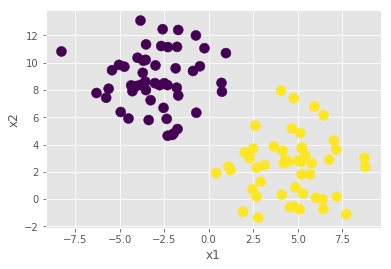

In [6]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
plt.scatter(X[:, 0], X[:, 1], s=100, c=y);
plt.xlabel('x1')
plt.ylabel('x2')

In [7]:
perceptron = Perceptron(input_datum_size = X.shape[1], learning_rate=0.1, epochs=100)

In [8]:
perceptron.fit(X, y)

In [9]:
# Calculate predicted_data
predicted_y = []
for i in range(X.shape[0]):
    predicted_y.append(perceptron.predict(X[i]))

In [10]:
# Let's calculate accuracy score
accuracy_score(predicted_y, y)

1.0